<a href="https://colab.research.google.com/github/jerome-keli/Fake-News-Detection/blob/main/Fake_News.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **About Dataset**

Fake contents are everywhere from social media platforms, news platforms and there is a big list. Considering the advancement in NLP research institutes are putting a lot of sweat, blood, and tears to detect the fake content generated across the platforms.

Fake news, defined by the New York Times as “a made-up story with an intention to deceive”, often for a secondary gain, is arguably one of the most serious challenges facing the news industry today. In a December Pew Research poll, 64% of US adults said that “made-up news” has caused a “great deal of confusion” about the facts of current events

https://www.kaggle.com/datasets/anmolkumar/fake-news-content-detection?resource=download

## **Objective**
My goal is to create an NLP model to address the fake content problem using data mining techniques.


## **Target Audience**
Journalists and Media Organizations: Professionals aiming to understand and implement AI-based solutions to combat fake news and misinformation.
Technology Enthusiasts: Individuals that are  passionate about applying AI to solve real-world problems.
News Enthusiasts: Individuals that are interested in news. They will be able to distinguish fake news from real news


## **Methodology**
**Data Preprocessing:**

* Import necessary libraries such as NumPy, Pandas, SKlearn and visualisation tools like Matplotlib and Seaborn.
* Load the dataset.
* Check for missing values and handle them appropriately.
* Drop any duplicates to ensure data quality.



**Exploratory Data Analysis (EDA):**
* Analyse the distribution of labels to understand the dataset better.
* Create visualisations, such as bar plots, to depict the distribution of various labels.
* Generate word clouds to visualise the most common words in the dataset.
**Text Processing:**
* Use NLTK to download and utilise stopwords for text cleaning.
* Apply TF-IDF Vectorizer to transform text data into numerical form suitable for machine learning models.

**Model Building:**
* Split the dataset into training and testing sets using train_test_split.
* Train a Naive Bayes classifier and a Decision Tree classifier to predict the labels of the text data.
* Evaluate the models using metrics like accuracy, and classification report.
* Visualise the distribution of predicted labels from both classifiers.

**Cosine Similarity:**
Use the cosine similarity matrix to measure the similarity between text documents.


### **Uploading the dataset**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import naive_bayes
from sklearn.metrics import roc_auc_score

In [ ]:
raw_data = pd.read_csv('/content/train.csv')
raw_data

,Labels,Text,Text_Tag
0,1,Says the Annies List political group supports ...,abortion
1,2,When did the decline of coal start? It started...,"energy,history,job-accomplishments"
2,3,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy
3,1,Health care reform legislation is likely to ma...,health-care
4,2,The economic turnaround started at the end of ...,"economy,jobs"
...,...,...,...
10235,3,There are a larger number of shark attacks in ...,"animals,elections"
10236,3,Democrats have now become the party of the [At...,elections
10237,2,Says an alternative to Social Security that op...,"retirement,social-security"
10238,1,On lifting the U.S. Cuban embargo and allowing...,"florida,foreign-policy"


### **Label key**


*   1 - False
*   2 - Half True
*   3 - Mostly True
*   4 - Not Known
*   5 - True





### **Data Cleaning & Preprocessing**

In [ ]:
# Checking for missing values
missing_values = raw_data.isnull().sum()
print(missing_values)

Labels      0
Text        0
Text_Tag    2
dtype: int64


In [ ]:
raw_data.shape

(10240, 3)

In [ ]:
# Dropping rows with missing values
df = raw_data.dropna()

In [ ]:
# Dropping duplicates
df.drop_duplicates()

,Labels,Text,Text_Tag
0,1,Says the Annies List political group supports ...,abortion
1,2,When did the decline of coal start? It started...,"energy,history,job-accomplishments"
2,3,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy
3,1,Health care reform legislation is likely to ma...,health-care
4,2,The economic turnaround started at the end of ...,"economy,jobs"
...,...,...,...
10235,3,There are a larger number of shark attacks in ...,"animals,elections"
10236,3,Democrats have now become the party of the [At...,elections
10237,2,Says an alternative to Social Security that op...,"retirement,social-security"
10238,1,On lifting the U.S. Cuban embargo and allowing...,"florida,foreign-policy"


In [ ]:
# Checking if the columns have the right data types
print(df.dtypes)

Labels       int64
Text        object
Text_Tag    object
dtype: object


In [ ]:
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 10238 entries, 0 to 10239
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Labels    10238 non-null  int64 
 1   Text      10238 non-null  object
 2   Text_Tag  10238 non-null  object
dtypes: int64(1), object(2)
memory usage: 319.9+ KB


(None,
    Labels                                               Text  \
 0       1  Says the Annies List political group supports ...   
 1       2  When did the decline of coal start? It started...   
 2       3  Hillary Clinton agrees with John McCain "by vo...   
 3       1  Health care reform legislation is likely to ma...   
 4       2  The economic turnaround started at the end of ...   
 
                              Text_Tag  
 0                            abortion  
 1  energy,history,job-accomplishments  
 2                      foreign-policy  
 3                         health-care  
 4                        economy,jobs  )

### **Exploratory Data Analysis**

In [ ]:
# Displaying the count of each label
df['Labels'].value_counts()

Labels
2    2114
1    1993
3    1962
5    1676
0    1654
4     839
Name: count, dtype: int64

In [ ]:
#drop all values with 0 label

df = df[df['Labels'] != 0]

<ipython-input-12-c493c5982fac>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Labels', data=df, palette='viridis')


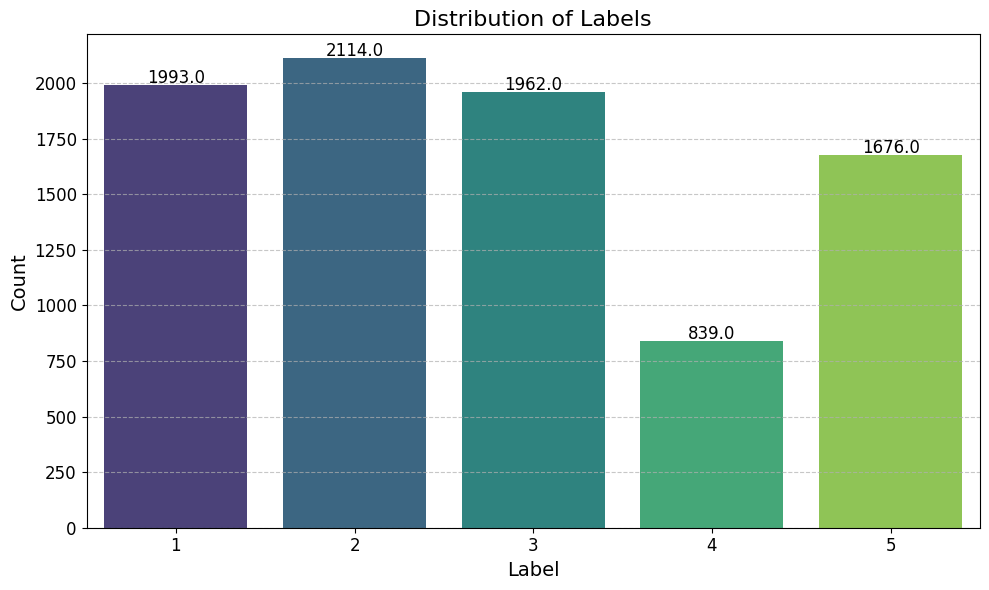

In [ ]:
# Displaying the distribution of labels
plt.figure(figsize=(10, 6))
sns.countplot(x='Labels', data=df, palette='viridis')
plt.title('Distribution of Labels', fontsize=16)
plt.xlabel('Label', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding annotations for conts
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                        textcoords='offset points')

plt.tight_layout()
plt.show()

In [ ]:
# Preparing the 'Text' column for the word cloud step by formatting it to the right type
train_df = pd.Series(df['Text'].tolist()).astype(str)

(-0.5, 1099.5, 849.5, -0.5)

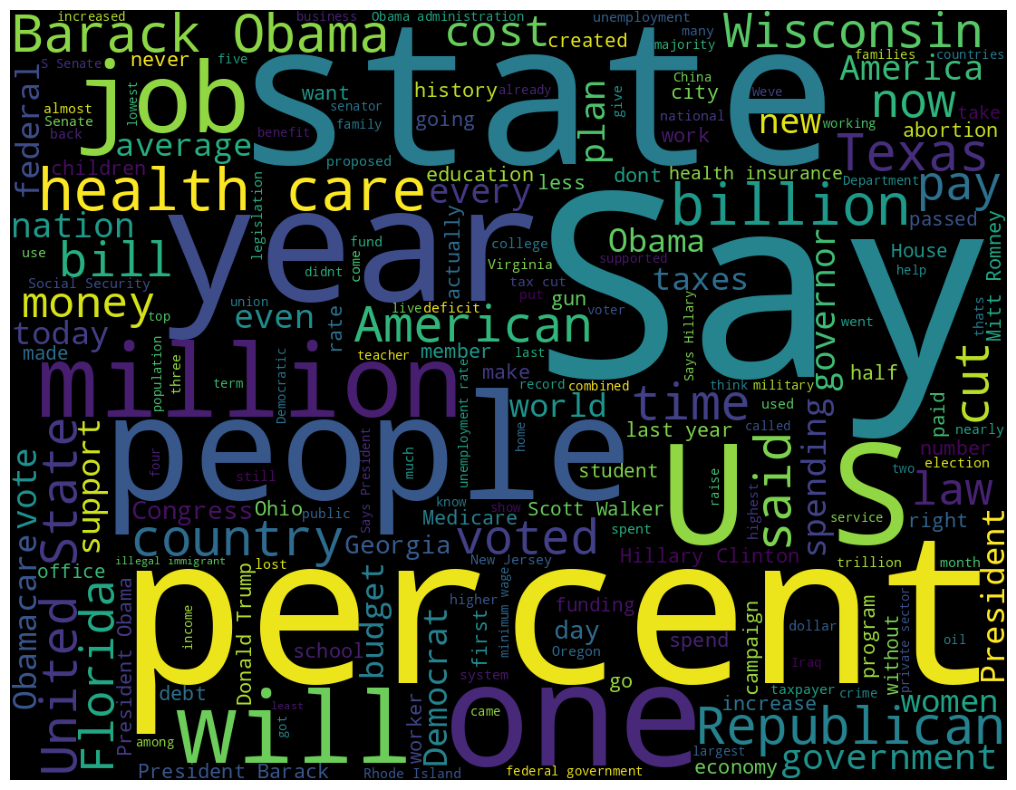

In [ ]:
# Wordcloud to svisualize the most frequent words in the text data
from wordcloud import WordCloud
cloud = WordCloud(width=1100, height=850).generate(" ".join(train_df.astype(str)))
plt.figure(figsize=(15, 10))
plt.imshow(cloud)
plt.axis('off')

In [ ]:
# Preparing the 'Text_Tag' column for the word cloud step by formatting it to the right type
train_dftt = pd.Series(df['Text_Tag'].tolist()).astype(str)

(-0.5, 1099.5, 849.5, -0.5)

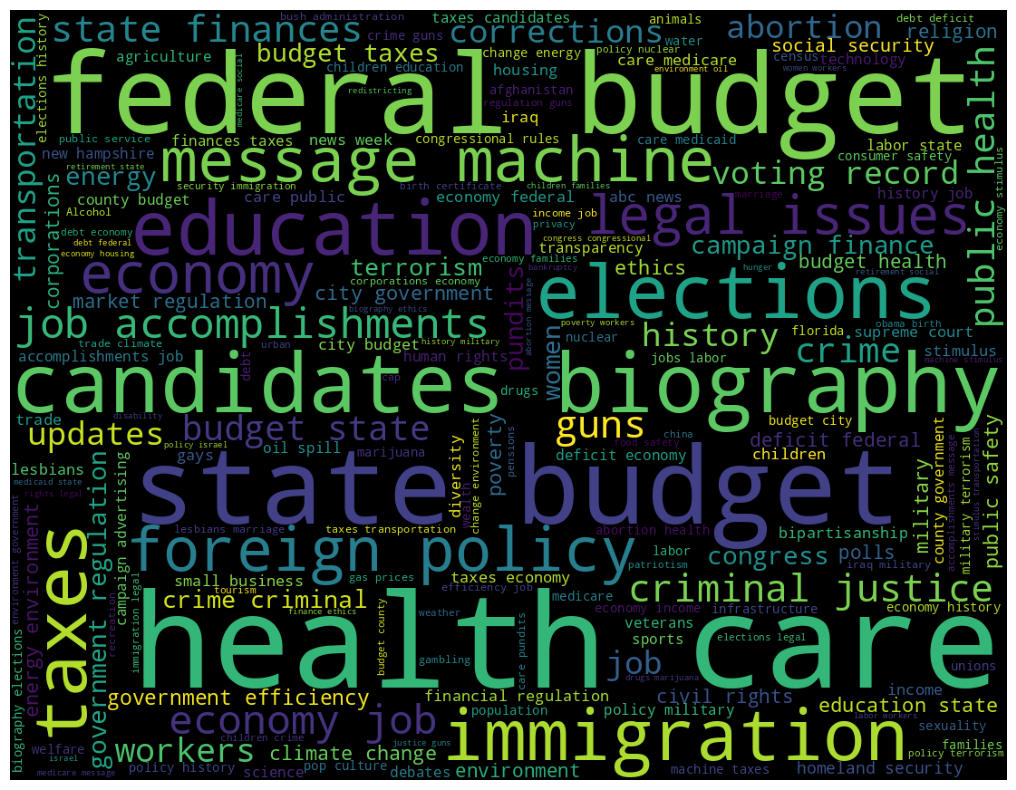

In [ ]:
# Wordcloud to visualize the most frequent words in the text_tag data
cloud = WordCloud(width=1100, height=850).generate(" ".join(train_dftt.astype(str)))
plt.figure(figsize=(15, 10))
plt.imshow(cloud)
plt.axis('off')

### **Text Processing**

In [ ]:
#Using NLTK to utilize stopwords for text cleaning
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Convert the set of stopwords to a list
stop_words_list = list(stopwords.words('english'))

# Applying TF-IDF Vectorizer to transform text data into numerical form suitable for machine learning models.
vector=TfidfVectorizer(use_idf=True,lowercase=True,strip_accents='ascii',stop_words=stop_words_list) # Use the list here
vector.fit(df)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


TfidfVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                strip_accents='ascii')

## **Building Model**

In [ ]:
y=df.Labels
x=vector.fit_transform(df.Text)

In [ ]:
#most repeated words
max(vector.get_feature_names_out())

'zuckerbergs'

In [ ]:
#train and test split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=4,test_size=0.2)

In [ ]:
#Using Naive Bayes model
clf = naive_bayes.MultinomialNB()
model=clf.fit(x_train, y_train)

In [ ]:
pred = model.predict(x_test)

pred

array([2, 1, 2, ..., 1, 1, 3])

<ipython-input-23-1f6c03bbbfcd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=pred, palette='viridis')


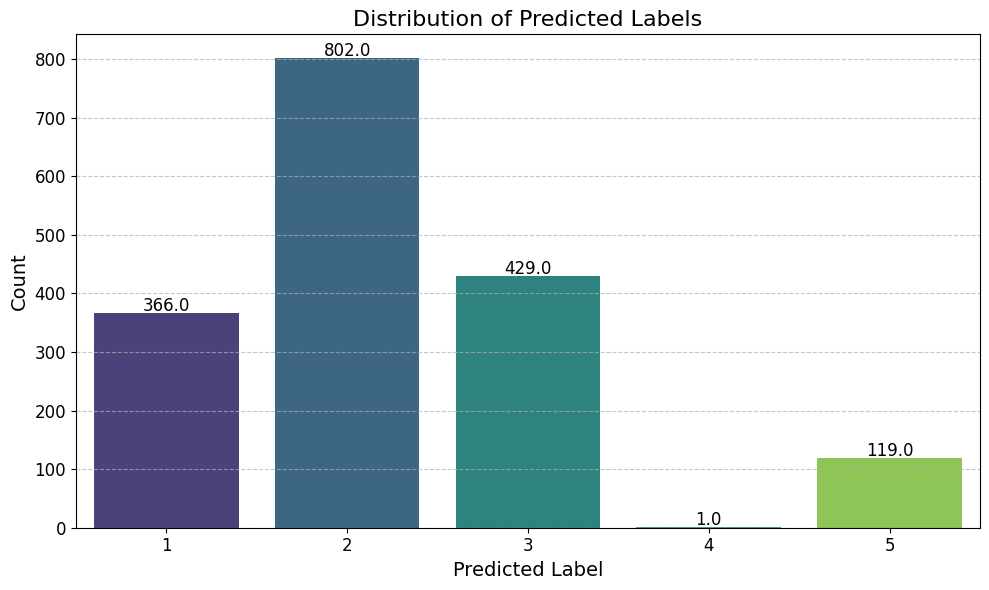

In [ ]:
# Assuming 'pred' is your array of predicted labels
plt.figure(figsize=(10, 6))
sns.countplot(x=pred, palette='viridis')
plt.title('Distribution of Predicted Labels', fontsize=16)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotations for counts
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                        textcoords='offset points')

plt.tight_layout()
plt.show()

In [ ]:
# Finding the accuracy of the Decison Tree Model
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier

dt= DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
print(accuracy_score(y_test,y_pred))



0.24577751892836341


In [ ]:
# Finding the accuracy of the Naive Bayes Model
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.28421665695981363
[[114 180  96   0  24]
 [ 78 222 104   0  28]
 [ 58 191 124   0  32]
 [ 56  77  20   1   8]
 [ 60 132  85   0  27]]
              precision    recall  f1-score   support

           1       0.31      0.28      0.29       414
           2       0.28      0.51      0.36       432
           3       0.29      0.31      0.30       405
           4       1.00      0.01      0.01       162
           5       0.23      0.09      0.13       304

    accuracy                           0.28      1717
   macro avg       0.42      0.24      0.22      1717
weighted avg       0.35      0.28      0.25      1717



<ipython-input-26-7ade1f088664>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_pred, palette='viridis')


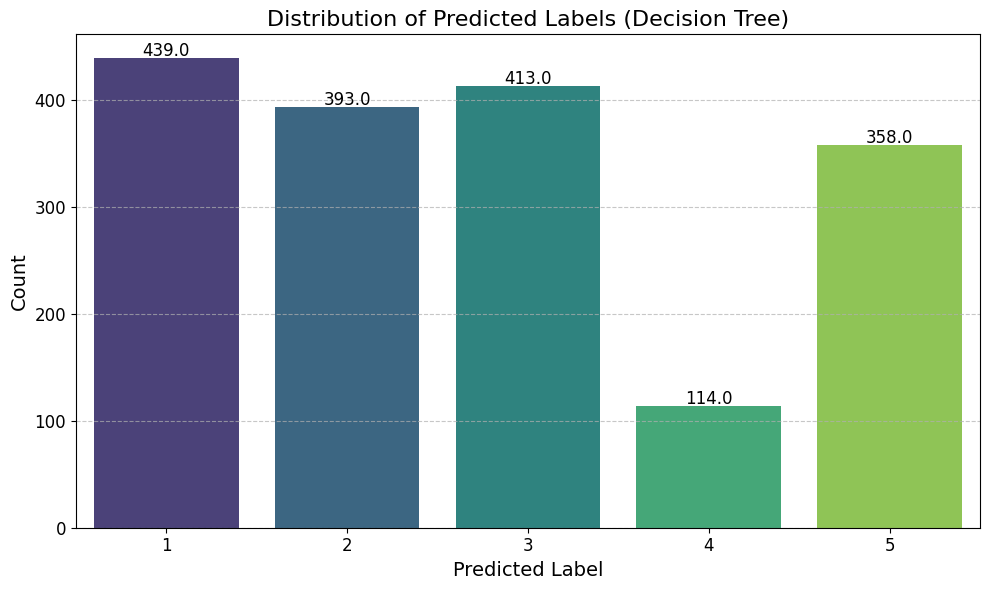

In [ ]:
# Assuming 'y_pred' is your array of predicted labels from the Decision Tree
plt.figure(figsize=(10, 6))
sns.countplot(x=y_pred, palette='viridis')
plt.title('Distribution of Predicted Labels (Decision Tree)', fontsize=16)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotations for counts
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                        textcoords='offset points')

plt.tight_layout()
plt.show()

In [ ]:
#cosine similarity
from sklearn.metrics.pairwise import cosine_similarity

# Assuming 'x' is my TF-IDF matrix of text data
similarity_matrix = cosine_similarity(x)
print(similarity_matrix)

[[1.         0.         0.         ... 0.00985177 0.         0.        ]
 [0.         1.         0.0606962  ... 0.         0.         0.        ]
 [0.         0.0606962  1.         ... 0.         0.         0.        ]
 ...
 [0.00985177 0.         0.         ... 1.         0.         0.        ]
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]


## **Analysis**
### **Word Cloud Analysis**
The word clouds generated for both the text data and the text tags provided significant insights into the prevalent themes and topics within the dataset.

**Text Word Cloud:**
* The word cloud for the 'Text' column highlighted the most frequent words in the dataset.
* Common terms such as "say", "people", "year", "state", "law", "percent", and "bill" were prominent.
* This indicates that the primary topics of discussion within the dataset were political statements, public opinion and legislative matters.

**Text_Tag Word Cloud:**
* The word cloud for the 'Text_Tag' column showed the most frequent tags associated with the text data.
* Prominent tags included "state", "budget", "immigration", "federal", "public health", and "education".
* These tags suggest that the dataset covers a topic such as governmental policies, public health issues and educational matters.

### **Labels Analysis**
The analysis of the labels provided insights into the model's performance and the distribution of the data.\
* Key = {1:’False’, 2: ‘Half True’, 3: ‘Most Likely’, 4: ‘Not Known’, 5: ‘True’ }
* I removed all the rows labelled 0 because it was not defined

**Actual Labels Distribution:**
The bar plot of the actual labels showed a varied distribution with significant entries for each label category.
This balanced distribution is crucial for training a robust model as it ensures that the model is exposed to a diverse set of examples.
* Results = {1:1993, 2:2114, 3:1962, 4:839, 5:1676}
* Based on the results, there is quite a high margin of uncertainty as ‘half true’ has the highest value and ‘most likely’ has the third highest value.
* Despite 839 unknown statements being ranked the lowest, it is still a large number.

### **Predicted Labels Distribution:**
The predicted labels from both the Naive Bayes and Decision Tree classifiers showed different distributions. A train and test split was conducted before testing each model.\
 **Naive Bayes Classifier**: The model's predictions were spread across the label categories which indicates its ability to generalise across different classes.
* Results = {1:366, 2:802, 3:429, 4:1, 5:119}
* There is more certainty as there is only 1 ‘not known’ statement in the testing phase. However, ‘half true’ and ‘most likely’ top the list, with ‘True’ ranking last. This indicates that most of the statements can be deemed as misinformation.

**Decision Tree Classifier**: The model showed a more balanced distribution of the categories.
*Results = {1:439, 2:393, 3:413, 4:114, 5:358}
* There are more ‘not known’ statements than the other model. Additionally, ‘false’ tops the list and true is at the penultimate position meaning that this model also proves that there is more fake news than real news.


## **Conclusion**
I developed a robust fake content detection model using NLP techniques. The steps outlined above, from data preprocessing to model evaluation, guide participants through the process of building and refining their algorithms.
The models require more fine tuning to provide more accurate results as the Decision Tree Classifier and the Naive Bayes models had accuracy scores of 0.246  and 0.284 respectively. Based on these scores, it is better to use the Naive Bayes Classifier results for this work.
In conclusion, I find it is useful to automate the detection of fake content by leveraging AI and machine learning. This supports efforts to maintain the integrity of information across platforms.

